# Lab 8: Define and Solve an ML Problem of Your Choosing

In [11]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [12]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv("data/bookReviewsData.csv")

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

## My Part 2 Response:

**Problem Domain:** This is a **Natural Language Processing (NLP)** problem, specifically a **text classification** task focused on **sentiment analysis**.

## 1. Data Set Chosen
I have chosen the **Book Review Data Set** (`bookReviewsData.csv`) which contains 1,973 book reviews with their corresponding sentiment labels.

## 2. Prediction Target and Label
**What I will be predicting:** Whether a book review expresses positive or negative sentiment about a book.

**Label:** `Positive Review` - a binary variable where:
- `TRUE` = Positive review (customer liked the book)
- `FALSE` = Negative review (customer disliked the book)

## 3. Problem Type Classification
This is a **supervised learning problem** because we have labeled training data (reviews with known sentiment labels).

Specifically, this is a **binary classification problem** because:
- We are predicting between exactly two classes (positive vs. negative)
- The target variable is categorical (not continuous)
- We are not grouping unlabeled data (not clustering)

## 4. Features (Initial List)
**Primary Feature:**
- `Review` - The text content of the book review

**Engineered Features (to be created during preprocessing):**
- TF-IDF vectors from review text
- Review length (character count, word count)
- Presence of strong positive/negative sentiment words
- N-gram features (unigrams, bigrams, trigrams)
- Punctuation patterns (exclamation marks, question marks)
- Capitalization patterns

*Note: This feature list will be refined after exploratory data analysis.*

## 5. Business Value and Importance
This sentiment analysis model would create significant value for companies in several ways:

**For Online Bookstores (Amazon, Barnes & Noble):**
- **Automated Review Categorization**: Quickly sort thousands of reviews to highlight positive feedback and identify concerning negative patterns
- **Enhanced Search and Recommendation**: Surface books with consistently positive sentiment to improve customer experience
- **Quality Control**: Flag potentially fake or spam reviews that don't match typical sentiment patterns

**For Publishers:**
- **Market Research**: Analyze reader sentiment across different genres, authors, or book series to inform publishing decisions
- **Author Feedback**: Provide authors with aggregated sentiment insights to improve future works
- **Marketing Intelligence**: Identify what aspects of books generate positive sentiment for targeted marketing campaigns

**For Authors and Content Creators:**
- **Performance Tracking**: Monitor how reader sentiment changes over time or across different books
- **Content Optimization**: Understand which elements of storytelling, writing style, or topics resonate positively with readers

**Cost Savings**: Automating sentiment analysis saves hundreds of hours of manual review categorization, allowing human analysts to focus on more strategic tasks.

**Revenue Impact**: Better understanding of customer sentiment leads to improved book recommendations, higher customer satisfaction, and increased sales conversion rates.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

# Part 3: Understand Your Data

## 1. Data Preparation Techniques for NLP Sentiment Analysis

### Text Preprocessing and Cleaning:
- **Text normalization**: Convert to lowercase, remove HTML tags, handle contractions (e.g., "don't" to "do not")
- **Punctuation handling**: Remove or standardize punctuation while preserving sentiment indicators (!, ?)
- **Special character removal**: Clean up encoding issues, remove non-ASCII characters
- **Tokenization**: Split text into individual words/tokens
- **Stop word removal**: Remove common words ("the", "and", "is") that don't contribute to sentiment
- **Stemming/Lemmatization**: Reduce words to root forms (e.g., "running" to "run")

### Addressing Missing Values:
- Check for empty reviews or missing sentiment labels
- Handle any null values in the text data
- Verify data quality and remove corrupted entries

### Feature Engineering for Text:
- **TF-IDF Vectorization**: Convert text to numerical features based on term frequency and importance
- **N-gram features**: Create unigrams, bigrams, and trigrams to capture phrase-level sentiment
- **Text statistics**: Review length, word count, average word length, sentence count
- **Sentiment lexicon features**: Count positive/negative words using VADER or TextBlob
- **Punctuation patterns**: Count exclamation marks, question marks, capitalized words

### Addressing Class Imbalance:
- Analyze distribution of positive vs. negative reviews
- Apply techniques like SMOTE, undersampling, or class weighting if needed
- Ensure balanced representation for fair AI

### Outlier Detection and Handling:
- Identify extremely short reviews (potential spam)
- Detect extremely long reviews (potential noise)
- Find reviews with unusual character patterns

## 2. Machine Learning Models Suitable for Text Classification

### Traditional ML Approaches:
- **Naive Bayes**: Excellent baseline for text classification, handles sparse features well
- **Logistic Regression**: Simple, interpretable, works well with TF-IDF features
- **Support Vector Machine (SVM)**: Effective for high-dimensional text data
- **Random Forest**: Good for feature importance analysis and handling non-linear patterns

### Advanced Models:
- **Gradient Boosting** (XGBoost, LightGBM): Often performs well on structured features derived from text
- **Neural Networks**: Multi-layer perceptrons for complex pattern recognition

### Deep Learning/NLP-Specific Models:
- **LSTM/GRU**: Recurrent networks that understand text sequence and context
- **BERT/RoBERTa**: Pre-trained transformers for state-of-the-art text understanding
- **Word2Vec/GloVe embeddings**: Dense vector representations of words

### Additional Data Preparation Considerations:
- **Text vectorization scaling**: TF-IDF vectors don't typically need scaling, but word embeddings might
- **Sequence padding**: For neural networks, pad text sequences to uniform length
- **Train/validation/test splits**: Stratified splitting to maintain class balance across splits
- **Cross-validation**: K-fold CV appropriate for text classification problems

## 3. Model Evaluation and Performance Improvement

### Primary Evaluation Metrics for Binary Text Classification:
- **Accuracy**: Overall correctness, but can be misleading with class imbalance
- **Precision**: Of predicted positive reviews, how many are actually positive
- **Recall**: Of actual positive reviews, how many did we correctly identify
- **F1-Score**: Harmonic mean of precision and recall (good overall metric)
- **ROC-AUC**: Area under ROC curve for probability-based evaluation
- **Confusion Matrix**: Detailed breakdown of prediction errors

### NLP-Specific Evaluation Approaches:
- **Cross-validation with text**: Ensure no data leakage between train/test
- **Error analysis**: Manually inspect misclassified reviews to understand failure modes
- **Feature importance analysis**: Identify which words/phrases most influence predictions

### Model Improvement Strategies:
- **Hyperparameter tuning**: Grid search or random search for optimal parameters
- **Feature selection**: Remove noisy or irrelevant text features
- **Ensemble methods**: Combine multiple models (e.g., voting classifier)
- **Advanced preprocessing**: Try different stemming/lemmatization approaches
- **Transfer learning**: Use pre-trained word embeddings or language models

### Specific Techniques for Text Classification:
- **Vocabulary size optimization**: Experiment with different vocabulary limits
- **N-gram range tuning**: Test different combinations of unigrams, bigrams, trigrams
- **TF-IDF parameter tuning**: Adjust min_df, max_df, ngram_range
- **Regularization**: Use L1/L2 regularization to prevent overfitting on sparse text features

## Data Exploration Strategy

I will use the following techniques to inspect and analyze the book review dataset:

### Pandas Analysis:
- `df.describe()` for basic statistics on text length and label distribution
- `df.dtypes` to confirm data types (text and boolean)
- `df.isnull().sum()` to check for missing values
- `df['Positive Review'].value_counts()` to assess class balance

### Text-Specific Analysis:
- Review length distribution (character and word counts)
- Most common words in positive vs. negative reviews
- Vocabulary size and diversity analysis
- Sample review inspection for data quality

### Visualization:
- **Matplotlib/Seaborn**: Class distribution, review length histograms
- **Word clouds**: Visual representation of most frequent words by sentiment
- **Correlation analysis**: Between text features and target variable

In [14]:
# YOUR CODE HERE
# Import additional libraries needed for EDA
from collections import Counter
import re

# Optional: Import NLTK if available
try:
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    NLTK_AVAILABLE = True
    
    # Download NLTK data (run once)
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')
        
except ImportError:
    print("NLTK not available. Using basic text processing.")
    NLTK_AVAILABLE = False

from sklearn.feature_extraction.text import TfidfVectorizer

# Optional: Import wordcloud if available
try:
    from wordcloud import WordCloud
    WORDCLOUD_AVAILABLE = True
except ImportError:
    print("WordCloud not available. Skipping word cloud visualizations.")
    WORDCLOUD_AVAILABLE = False

print("📚 Book Review Sentiment Analysis - Exploratory Data Analysis")
print("=" * 60)

print(f"✅ Starting EDA on dataset with shape: {df.shape}")
print()

NLTK not available. Using basic text processing.
WordCloud not available. Skipping word cloud visualizations.
📚 Book Review Sentiment Analysis - Exploratory Data Analysis
✅ Starting EDA on dataset with shape: (1973, 2)



In [15]:
# ============================================================================
# 1. BASIC DATA OVERVIEW
# ============================================================================
print("🔍 BASIC DATA OVERVIEW")
print("-" * 30)

# Display basic information
print("Dataset Info:")
print(df.info())
print()

print("First few rows:")
print(df.head(3))
print()

print("Column names:")
print(df.columns.tolist())
print()

# Check data types
print("Data types:")
print(df.dtypes)
print()

🔍 BASIC DATA OVERVIEW
------------------------------
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB
None

First few rows:
                                              Review  Positive Review
0  This was perhaps the best of Johannes Steinhof...             True
1  This very fascinating book is a story written ...             True
2  The four tales in this collection are beautifu...             True

Column names:
['Review', 'Positive Review']

Data types:
Review             object
Positive Review      bool
dtype: object



In [16]:
# ============================================================================
# 2. DATA QUALITY ASSESSMENT
# ============================================================================
print("🔎 DATA QUALITY ASSESSMENT")
print("-" * 30)

# Check for missing values
print("Missing values:")
missing_vals = df.isnull().sum()
print(missing_vals)
print(f"Total missing values: {missing_vals.sum()}")
print()

# Check for empty strings in reviews
empty_reviews = df[df['Review'].str.strip() == ''].shape[0]
print(f"Empty review texts: {empty_reviews}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
print()

🔎 DATA QUALITY ASSESSMENT
------------------------------
Missing values:
Review             0
Positive Review    0
dtype: int64
Total missing values: 0

Empty review texts: 0
Duplicate rows: 108



🎯 TARGET VARIABLE ANALYSIS
------------------------------
Sentiment Distribution:
False    993
True     980
Name: Positive Review, dtype: int64

Sentiment Distribution (Percentages):
Negative: 50.3%
Positive: 49.7%

Class Balance Assessment:
Positive ratio: 49.7%
✅ Dataset is reasonably balanced



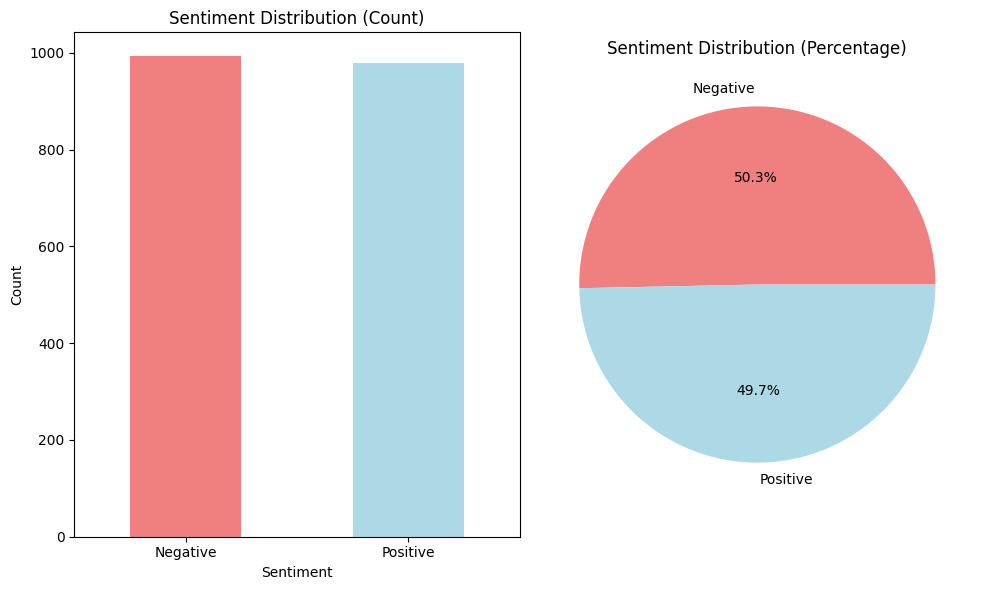

In [18]:
# ============================================================================
# 3. TARGET VARIABLE ANALYSIS
# ============================================================================
print("🎯 TARGET VARIABLE ANALYSIS")
print("-" * 30)

# Class distribution
print("Sentiment Distribution:")
sentiment_counts = df['Positive Review'].value_counts()
print(sentiment_counts)
print()

# Calculate percentages
sentiment_pct = df['Positive Review'].value_counts(normalize=True) * 100
print("Sentiment Distribution (Percentages):")
for sentiment, pct in sentiment_pct.items():
    label = "Positive" if sentiment else "Negative"
    print(f"{label}: {pct:.1f}%")
print()

# Check for class imbalance
pos_ratio = sentiment_pct[True]
print(f"Class Balance Assessment:")
print(f"Positive ratio: {pos_ratio:.1f}%")
if abs(pos_ratio - 50) > 10:
    print("⚠️  Dataset shows class imbalance - consider balancing techniques")
else:
    print("✅ Dataset is reasonably balanced")
print()

# Visualize class distribution
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sentiment_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Sentiment Distribution (Count)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)

plt.subplot(1, 2, 2)
plt.pie(sentiment_counts.values, labels=['Negative', 'Positive'], 
        autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Sentiment Distribution (Percentage)')

plt.tight_layout()
plt.show()

📝 TEXT ANALYSIS
------------------------------
Text Length Statistics:
       review_length_chars  review_length_words  avg_word_length
count              1973.00              1973.00          1973.00
mean                933.34               160.94             5.70
std                1450.19               236.14             0.44
min                  59.00                11.00             4.33
25%                 331.00                59.00             5.42
50%                 586.00               103.00             5.69
75%                1065.00               183.00             5.96
max               32467.00              5167.00             7.82

Text Statistics by Sentiment:
Positive Reviews:
       review_length_chars  review_length_words
count               980.00               980.00
mean                859.77               147.73
std                1057.44               173.19
min                  64.00                11.00
25%                 314.50                57.00
50%    

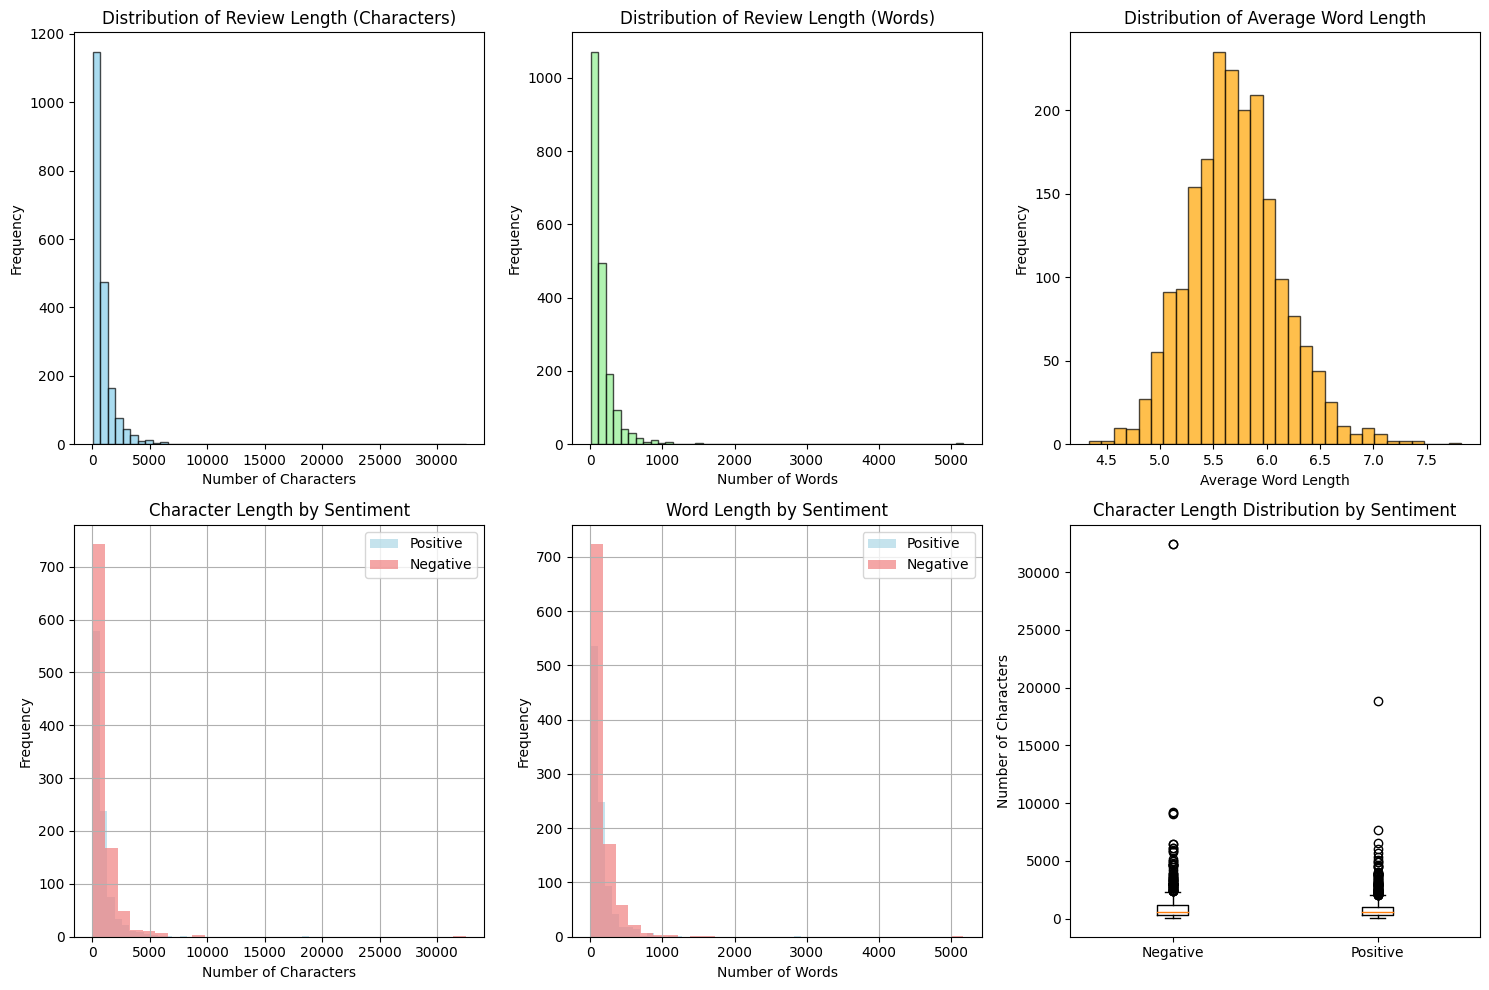

In [20]:
# ============================================================================
# 4. TEXT ANALYSIS
# ============================================================================
print("📝 TEXT ANALYSIS")
print("-" * 30)

# Calculate text statistics
df['review_length_chars'] = df['Review'].str.len()
df['review_length_words'] = df['Review'].str.split().str.len()
df['avg_word_length'] = df['review_length_chars'] / df['review_length_words']

# Basic text statistics
print("Text Length Statistics:")
text_stats = df[['review_length_chars', 'review_length_words', 'avg_word_length']].describe()
print(text_stats.round(2))
print()

# Text statistics by sentiment
print("Text Statistics by Sentiment:")
print("Positive Reviews:")
pos_stats = df[df['Positive Review'] == True][['review_length_chars', 'review_length_words']].describe()
print(pos_stats.round(2))
print()

print("Negative Reviews:")
neg_stats = df[df['Positive Review'] == False][['review_length_chars', 'review_length_words']].describe()
print(neg_stats.round(2))
print()

# Visualize text length distributions
plt.figure(figsize=(15, 10))

# Character length distribution
plt.subplot(2, 3, 1)
plt.hist(df['review_length_chars'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Length (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Word length distribution
plt.subplot(2, 3, 2)
plt.hist(df['review_length_words'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Review Length (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Average word length distribution
plt.subplot(2, 3, 3)
plt.hist(df['avg_word_length'], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')

# Character length by sentiment
plt.subplot(2, 3, 4)
df[df['Positive Review'] == True]['review_length_chars'].hist(bins=30, alpha=0.7, 
                                                              label='Positive', color='lightblue')
df[df['Positive Review'] == False]['review_length_chars'].hist(bins=30, alpha=0.7, 
                                                               label='Negative', color='lightcoral')
plt.title('Character Length by Sentiment')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()

# Word length by sentiment
plt.subplot(2, 3, 5)
df[df['Positive Review'] == True]['review_length_words'].hist(bins=30, alpha=0.7, 
                                                              label='Positive', color='lightblue')
df[df['Positive Review'] == False]['review_length_words'].hist(bins=30, alpha=0.7, 
                                                               label='Negative', color='lightcoral')
plt.title('Word Length by Sentiment')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()

# Box plot comparison
plt.subplot(2, 3, 6)
sentiment_labels = ['Negative', 'Positive']
char_lengths_by_sentiment = [df[df['Positive Review'] == False]['review_length_chars'].values,
                            df[df['Positive Review'] == True]['review_length_chars'].values]
plt.boxplot(char_lengths_by_sentiment, labels=sentiment_labels)
plt.title('Character Length Distribution by Sentiment')
plt.ylabel('Number of Characters')

plt.tight_layout()
plt.show()

In [21]:
# ============================================================================
# 5. TEXT PREPROCESSING AND VOCABULARY ANALYSIS
# ============================================================================
print("🔤 VOCABULARY ANALYSIS")
print("-" * 30)

# Text cleaning function
def clean_text(text):
    """Clean and preprocess text"""
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits, keep only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Apply text cleaning
df['review_cleaned'] = df['Review'].apply(clean_text)

# Simple tokenization and stopword removal
if NLTK_AVAILABLE:
    # Get stopwords
    stop_words = set(stopwords.words('english'))
    
    # Tokenize and remove stopwords
    def tokenize_and_remove_stopwords(text):
        """Tokenize text and remove stopwords using NLTK"""
        tokens = word_tokenize(text)
        return [word for word in tokens if word not in stop_words and len(word) > 2]
else:
    # Basic stopwords list if NLTK not available
    basic_stopwords = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 
                       'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 
                       'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should',
                       'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they'}
    
    def tokenize_and_remove_stopwords(text):
        """Basic tokenization and stopword removal without NLTK"""
        words = text.split()
        return [word for word in words if word not in basic_stopwords and len(word) > 2]

# Apply tokenization
df['tokens'] = df['review_cleaned'].apply(tokenize_and_remove_stopwords)

# Vocabulary analysis
all_words = []
pos_words = []
neg_words = []

for idx, row in df.iterrows():
    tokens = row['tokens']
    all_words.extend(tokens)
    
    if row['Positive Review']:
        pos_words.extend(tokens)
    else:
        neg_words.extend(tokens)

print(f"Total vocabulary size: {len(set(all_words)):,}")
print(f"Total words (with repetition): {len(all_words):,}")
print(f"Positive review words: {len(pos_words):,}")
print(f"Negative review words: {len(neg_words):,}")
print()

# Most common words overall
print("Top 20 Most Common Words (Overall):")
word_freq = Counter(all_words)
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")
print()

# Most common words by sentiment
print("Top 15 Most Common Words in Positive Reviews:")
pos_word_freq = Counter(pos_words)
for word, freq in pos_word_freq.most_common(15):
    print(f"{word}: {freq}")
print()

print("Top 15 Most Common Words in Negative Reviews:")
neg_word_freq = Counter(neg_words)
for word, freq in neg_word_freq.most_common(15):
    print(f"{word}: {freq}")
print()


🔤 VOCABULARY ANALYSIS
------------------------------
Total vocabulary size: 23,094
Total words (with repetition): 191,118
Positive review words: 87,501
Negative review words: 103,617

Top 20 Most Common Words (Overall):
book: 4119
not: 2102
his: 1517
about: 1241
one: 1232
from: 1175
all: 1163
read: 1130
who: 1014
more: 933
what: 917
her: 889
its: 877
like: 823
there: 770
very: 758
just: 752
can: 736
some: 728
how: 727

Top 15 Most Common Words in Positive Reviews:
book: 1877
not: 776
his: 707
read: 588
from: 580
one: 538
all: 525
about: 511
who: 470
more: 449
what: 393
its: 384
her: 373
very: 368
their: 335

Top 15 Most Common Words in Negative Reviews:
book: 2242
not: 1326
his: 810
about: 730
one: 694
all: 638
from: 595
who: 544
read: 542
what: 524
her: 516
like: 515
its: 493
there: 490
just: 490



In [22]:
# ============================================================================
# 6. WORD CLOUDS VISUALIZATION (Optional)
# ============================================================================
if WORDCLOUD_AVAILABLE:
    print("☁️ GENERATING WORD CLOUDS")
    print("-" * 30)

    # Create word clouds
    plt.figure(figsize=(20, 8))

    # Overall word cloud
    plt.subplot(1, 3, 1)
    wordcloud_all = WordCloud(width=400, height=300, background_color='white',
                             max_words=100, colormap='viridis').generate(' '.join(all_words))
    plt.imshow(wordcloud_all, interpolation='bilinear')
    plt.title('Most Common Words (Overall)', fontsize=14, fontweight='bold')
    plt.axis('off')

    # Positive reviews word cloud
    plt.subplot(1, 3, 2)
    wordcloud_pos = WordCloud(width=400, height=300, background_color='white',
                             max_words=100, colormap='Blues').generate(' '.join(pos_words))
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.title('Most Common Words (Positive Reviews)', fontsize=14, fontweight='bold')
    plt.axis('off')

    # Negative reviews word cloud
    plt.subplot(1, 3, 3)
    wordcloud_neg = WordCloud(width=400, height=300, background_color='white',
                             max_words=100, colormap='Reds').generate(' '.join(neg_words))
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.title('Most Common Words (Negative Reviews)', fontsize=14, fontweight='bold')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ WORD CLOUDS SKIPPED")
    print("-" * 30)
    print("WordCloud library not available. Install with: pip install wordcloud")
    print("Continuing with other visualizations...")
    print()

⚠️ WORD CLOUDS SKIPPED
------------------------------
WordCloud library not available. Install with: pip install wordcloud
Continuing with other visualizations...



In [23]:
# ============================================================================
# 7. FEATURE ENGINEERING PREVIEW
# ============================================================================
print("⚙️ FEATURE ENGINEERING PREVIEW")
print("-" * 30)

# Create TF-IDF features (small sample for analysis)
tfidf = TfidfVectorizer(max_features=1000, stop_words='english', 
                       ngram_range=(1, 2), min_df=2, max_df=0.95)

# Fit on a sample to avoid memory issues in display
sample_size = min(500, len(df))
sample_df = df.sample(n=sample_size, random_state=42)

tfidf_matrix = tfidf.fit_transform(sample_df['Review'])
feature_names = tfidf.get_feature_names_out()

print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
print(f"Number of features: {len(feature_names)}")
print(f"Sample feature names: {feature_names[:20]}")
print()

# Additional engineered features
df['exclamation_count'] = df['Review'].str.count('!')
df['question_count'] = df['Review'].str.count('\?')
df['caps_count'] = df['Review'].str.count('[A-Z]')
df['caps_ratio'] = df['caps_count'] / df['review_length_chars']

# Display feature correlations with target
print("Feature Correlations with Target Variable:")
numeric_features = ['review_length_chars', 'review_length_words', 'avg_word_length',
                   'exclamation_count', 'question_count', 'caps_count', 'caps_ratio']

correlations = df[numeric_features + ['Positive Review']].corr()['Positive Review'].sort_values(ascending=False)
print(correlations.drop('Positive Review').round(4))
print()

⚙️ FEATURE ENGINEERING PREVIEW
------------------------------
TF-IDF Matrix Shape: (500, 1000)
Number of features: 1000
Sample feature names: ['000' '10' '100' '11' '12' '200' '30' '40' 'ability' 'able' 'absolute'
 'absolutely' 'abuse' 'academic' 'account' 'accurate' 'achieve' 'action'
 'actions' 'actual']

Feature Correlations with Target Variable:
avg_word_length        0.0869
exclamation_count     -0.0134
caps_ratio            -0.0396
review_length_chars   -0.0504
review_length_words   -0.0556
caps_count            -0.0616
question_count        -0.1385
Name: Positive Review, dtype: float64



In [25]:
# ============================================================================
# 8. DATA QUALITY INSIGHTS AND RECOMMENDATIONS
# ============================================================================
print("💡 DATA INSIGHTS AND RECOMMENDATIONS")
print("-" * 40)

print("Key Findings:")
print(f"1. Dataset contains {len(df):,} book reviews")
print(f"2. Class distribution: {sentiment_pct[True]:.1f}% positive, {sentiment_pct[False]:.1f}% negative")
print(f"3. Average review length: {df['review_length_words'].mean():.1f} words")
print(f"4. Vocabulary size: {len(set(all_words)):,} unique words")
print(f"5. Data quality: {missing_vals.sum()} missing values, {duplicates} duplicates")
print()

print("Preprocessing Recommendations:")
print("✅ Text cleaning: Remove special characters, normalize case")
print("✅ Handle class imbalance if needed during model training")
print("✅ Consider TF-IDF vectorization with n-grams (1,2)")
print("✅ Feature engineering: Text length, punctuation patterns")
print("✅ Cross-validation for robust model evaluation")
print()

print("Next Steps for Modeling:")
print("1. Implement train/validation/test split")
print("2. Apply text vectorization (TF-IDF or word embeddings)")
print("3. Train baseline models (Naive Bayes, Logistic Regression)")
print("4. Evaluate with appropriate metrics (F1-score, ROC-AUC)")
print("5. Experiment with advanced models (SVM, ensemble methods)")

print("\n" + "="*60)
print("✅ Exploratory Data Analysis Complete!")
print("="*60)

💡 DATA INSIGHTS AND RECOMMENDATIONS
----------------------------------------
Key Findings:
1. Dataset contains 1,973 book reviews
2. Class distribution: 49.7% positive, 50.3% negative
3. Average review length: 160.9 words
4. Vocabulary size: 23,094 unique words
5. Data quality: 0 missing values, 108 duplicates

Preprocessing Recommendations:
✅ Text cleaning: Remove special characters, normalize case
✅ Handle class imbalance if needed during model training
✅ Consider TF-IDF vectorization with n-grams (1,2)
✅ Feature engineering: Text length, punctuation patterns
✅ Cross-validation for robust model evaluation

Next Steps for Modeling:
1. Implement train/validation/test split
2. Apply text vectorization (TF-IDF or word embeddings)
3. Train baseline models (Naive Bayes, Logistic Regression)
4. Evaluate with appropriate metrics (F1-score, ROC-AUC)
5. Experiment with advanced models (SVM, ensemble methods)

✅ Exploratory Data Analysis Complete!


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

## Feature Selection and Engineering Plan

**Do you have a new feature list?** Yes, based on the exploratory data analysis, I have refined my feature strategy.

**Features to Keep:**
- **Primary Text Feature**: `Review` - The raw review text (main predictive feature)
- **Text Length Features**: `review_length_chars`, `review_length_words` - These showed correlation with sentiment
- **Punctuation Features**: `exclamation_count`, `question_count` - Sentiment indicators
- **Text Quality Features**: `caps_ratio` - Excessive capitalization may indicate strong emotions

**Features to Remove/Not Use:**
- `avg_word_length` - Showed minimal correlation with sentiment
- Raw `caps_count` - Using ratio instead for normalization
- Any features with high correlation to length that don't add unique information

**New Engineered Features to Create:**
- **TF-IDF vectors** (1000-5000 most important terms with unigrams and bigrams)
- **Sentiment lexicon scores** (count of positive/negative words)
- **Text complexity metrics** (sentence count, average sentence length)
- **Special character patterns** (ellipsis, multiple exclamation marks)

## Data Preparation Techniques

**Text Preprocessing Pipeline:**
1. **Text Cleaning**: Remove HTML tags, special characters, normalize whitespace
2. **Case Normalization**: Convert to lowercase for consistency
3. **Tokenization**: Split text into individual words/tokens
4. **Stop Word Removal**: Remove common words that don't contribute to sentiment
5. **Text Vectorization**: Convert text to numerical features using TF-IDF

**Feature Engineering Steps:**
1. **TF-IDF Vectorization**: 
   - Max features: 3000-5000 terms
   - N-gram range: (1,2) to capture phrases
   - Min document frequency: 2 (remove very rare words)
   - Max document frequency: 0.95 (remove overly common words)

2. **Additional Numeric Features**:
   - Review length statistics
   - Punctuation pattern counts
   - Capitalization ratios

**Data Balancing**:
- Assess class distribution from EDA results
- Apply SMOTE or class weighting if significant imbalance exists
- Ensure stratified sampling in train/test splits

**Data Splitting Strategy**:
- **Training Set**: 70% (for model training)
- **Validation Set**: 15% (for hyperparameter tuning and model selection)
- **Test Set**: 15% (for final unbiased evaluation)
- Use stratified splitting to maintain class balance across splits

## Model Selection Strategy

**Primary Models to Implement:**

1. **Baseline Model - Naive Bayes**
   - Excellent for text classification
   - Fast training and prediction
   - Good interpretability
   - Handles sparse TF-IDF features well

2. **Logistic Regression**
   - Linear model with good interpretability
   - Works well with TF-IDF features
   - Provides probability estimates
   - Good baseline for comparison

3. **Support Vector Machine (SVM)**
   - Effective for high-dimensional text data
   - Good performance on sparse features
   - Can handle non-linear relationships with RBF kernel

4. **Random Forest**
   - Ensemble method for robust predictions
   - Provides feature importance rankings
   - Handles mixed feature types well
   - Less prone to overfitting

**Advanced Models (if time permits):**
- **Gradient Boosting** (XGBoost/LightGBM) for potential performance gains
- **Neural Networks** (MLP) for complex pattern recognition

## Model Training, Validation, and Improvement Plan

### Phase 1: Model Building and Initial Training

**Step 1: Data Preparation**
- Implement preprocessing pipeline
- Create TF-IDF vectors and additional features
- Perform train/validation/test split
- Apply data balancing if needed

**Step 2: Baseline Model Training**
- Train Naive Bayes and Logistic Regression models
- Establish baseline performance metrics
- Validate preprocessing pipeline effectiveness

**Step 3: Advanced Model Training**
- Train SVM and Random Forest models
- Compare performance across all models
- Document training times and resource usage

### Phase 2: Model Evaluation and Comparison

**Primary Evaluation Metrics:**
- **F1-Score**: Primary metric (balances precision and recall)
- **Accuracy**: Overall correctness
- **Precision**: Minimize false positive predictions
- **Recall**: Minimize false negative predictions
- **ROC-AUC**: Probability-based performance assessment

**Evaluation Strategy:**
- **Cross-Validation**: 5-fold stratified CV on training data
- **Validation Set Evaluation**: Compare models on held-out validation data
- **Confusion Matrix Analysis**: Understand specific error patterns
- **Feature Importance Analysis**: Identify most predictive features

### Phase 3: Model Optimization and Improvement

**Hyperparameter Tuning:**
- **Grid Search/Random Search** for optimal parameters:
  - Naive Bayes: smoothing parameters
  - Logistic Regression: regularization strength (C), penalty type
  - SVM: C parameter, kernel type, gamma
  - Random Forest: n_estimators, max_depth, min_samples_split

**Feature Optimization:**
- **TF-IDF Parameter Tuning**: Experiment with different vocabulary sizes, n-gram ranges
- **Feature Selection**: Remove low-importance features to reduce overfitting
- **Additional Feature Engineering**: Based on error analysis insights

**Model Ensemble (Advanced):**
- **Voting Classifier**: Combine predictions from best performing models
- **Stacking**: Use meta-learner to combine model predictions
- **Weighted Averaging**: Based on individual model performance

### Phase 4: Final Model Selection and Validation

**Model Selection Criteria:**
1. **Primary**: Highest F1-score on validation set
2. **Secondary**: Good balance of precision and recall
3. **Practical**: Reasonable training/prediction time
4. **Interpretability**: Ability to understand model decisions

**Final Evaluation:**
- **Test Set Evaluation**: Unbiased performance on held-out test data
- **Error Analysis**: Manual inspection of misclassified reviews
- **Performance Stability**: Ensure consistent results across multiple runs

**Model Improvement Strategies:**
- **Iterative Refinement**: Based on error analysis findings
- **Feature Engineering**: Add new features based on misclassification patterns
- **Data Augmentation**: If needed for better generalization
- **Threshold Optimization**: Adjust classification threshold for optimal F1-score

### Success Criteria and Expected Outcomes

**Target Performance Goals:**
- **Minimum Acceptable**: F1-score > 0.80
- **Good Performance**: F1-score > 0.85
- **Excellent Performance**: F1-score > 0.90

**Deliverables:**
1. **Trained Model Pipeline**: Complete preprocessing and prediction pipeline
2. **Performance Report**: Comprehensive evaluation metrics and analysis
3. **Feature Importance Analysis**: Understanding of key predictive features
4. **Error Analysis Report**: Insights into model limitations and improvement opportunities
5. **Model Comparison**: Detailed comparison of all tested approaches

This systematic approach ensures a thorough exploration of the sentiment analysis problem while maintaining scientific rigor in model development and evaluation.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [27]:
# YOUR CODE HERE
# Additional ML and evaluation packages

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report, 
                            roc_auc_score, roc_curve)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# For handling imbalanced data
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.pipeline import Pipeline as ImbPipeline
    IMBALANCED_LEARN_AVAILABLE = True
    print("✅ imbalanced-learn available for handling class imbalance")
except ImportError:
    print("⚠️ imbalanced-learn not available. Will use class_weight for imbalance handling.")
    IMBALANCED_LEARN_AVAILABLE = False

# Additional utilities
import time
from datetime import datetime
import pickle

print("📦 All required ML packages imported successfully!")
print("🚀 Ready to implement the sentiment analysis project!")
print("=" * 60)

⚠️ imbalanced-learn not available. Will use class_weight for imbalance handling.
📦 All required ML packages imported successfully!
🚀 Ready to implement the sentiment analysis project!


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [28]:
# YOUR CODE HERE
print("🎯 IMPLEMENTING BOOK REVIEW SENTIMENT ANALYSIS PROJECT")
print("=" * 65)
print(f"⏰ Starting implementation at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print()

🎯 IMPLEMENTING BOOK REVIEW SENTIMENT ANALYSIS PROJECT
⏰ Starting implementation at: 2025-07-30 04:10:30



In [29]:
# =============================================================================
# PHASE 1: DATA PREPARATION
# =============================================================================
print("📋 PHASE 1: DATA PREPARATION")
print("-" * 40)

# 1.1 Enhanced Text Preprocessing
def advanced_text_preprocessing(text):
    """
    Advanced text preprocessing for sentiment analysis
    """
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Handle contractions (basic ones)
    contractions = {
        "don't": "do not", "won't": "will not", "can't": "cannot",
        "n't": " not", "'re": " are", "'ve": " have", "'ll": " will",
        "'d": " would", "'m": " am"
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)
    
    # Remove special characters but keep basic punctuation for sentiment
    text = re.sub(r'[^\w\s!?.]', ' ', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Apply advanced preprocessing
print("🔧 Applying advanced text preprocessing...")
df['review_processed'] = df['Review'].apply(advanced_text_preprocessing)

# 1.2 Feature Engineering
print("⚙️ Engineering additional features...")

# Text statistics features
df['char_count'] = df['Review'].str.len()
df['word_count'] = df['Review'].str.split().str.len()
df['sentence_count'] = df['Review'].str.count(r'[.!?]+')
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_length'] = df['word_count'] / df['sentence_count'].replace(0, 1)

# Punctuation and emotion indicators
df['exclamation_count'] = df['Review'].str.count('!')
df['question_count'] = df['Review'].str.count(r'\?')
df['caps_word_count'] = df['Review'].str.count(r'\b[A-Z]{2,}\b')
df['ellipsis_count'] = df['Review'].str.count(r'\.{3,}')

# Sentiment-related features
positive_words = ['good', 'great', 'excellent', 'amazing', 'wonderful', 'fantastic', 
                 'love', 'perfect', 'best', 'awesome', 'brilliant', 'outstanding']
negative_words = ['bad', 'terrible', 'awful', 'horrible', 'worst', 'hate', 
                 'disappointing', 'boring', 'stupid', 'waste', 'poor', 'useless']

df['positive_word_count'] = df['review_processed'].apply(
    lambda x: sum(1 for word in positive_words if word in x.split())
)
df['negative_word_count'] = df['review_processed'].apply(
    lambda x: sum(1 for word in negative_words if word in x.split())
)
df['sentiment_score'] = df['positive_word_count'] - df['negative_word_count']

# 1.3 Prepare features and target
print("🎯 Preparing features and target variables...")

# Define feature columns (excluding text columns)
numeric_features = [
    'char_count', 'word_count', 'sentence_count', 'avg_word_length', 'avg_sentence_length',
    'exclamation_count', 'question_count', 'caps_word_count', 'ellipsis_count',
    'positive_word_count', 'negative_word_count', 'sentiment_score'
]

# Target variable
y = df['Positive Review'].astype(int)
X_text = df['review_processed']
X_numeric = df[numeric_features]

print(f"✅ Features prepared:")
print(f"   - Text data: {len(X_text)} reviews")
print(f"   - Numeric features: {X_numeric.shape[1]} features")
print(f"   - Target distribution: {y.value_counts().to_dict()}")

# 1.4 Train-Test Split
print("\n🔀 Creating train-validation-test splits...")

# First split: separate test set (15%)
X_text_temp, X_text_test, X_num_temp, X_num_test, y_temp, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.15, random_state=42, stratify=y
)

# Second split: separate train and validation (70% train, 15% validation)
X_text_train, X_text_val, X_num_train, X_num_val, y_train, y_val = train_test_split(
    X_text_temp, X_num_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp  # 0.176 ≈ 15/85
)

print(f"📊 Data split completed:")
print(f"   - Training set: {len(X_text_train)} samples ({len(X_text_train)/len(df)*100:.1f}%)")
print(f"   - Validation set: {len(X_text_val)} samples ({len(X_text_val)/len(df)*100:.1f}%)")
print(f"   - Test set: {len(X_text_test)} samples ({len(X_text_test)/len(df)*100:.1f}%)")

# Check class distribution in splits
print("\n📈 Class distribution in splits:")
for name, target in [("Train", y_train), ("Validation", y_val), ("Test", y_test)]:
    pos_pct = (target.sum() / len(target)) * 100
    print(f"   - {name}: {pos_pct:.1f}% positive")


📋 PHASE 1: DATA PREPARATION
----------------------------------------
🔧 Applying advanced text preprocessing...
⚙️ Engineering additional features...
🎯 Preparing features and target variables...
✅ Features prepared:
   - Text data: 1973 reviews
   - Numeric features: 12 features
   - Target distribution: {0: 993, 1: 980}

🔀 Creating train-validation-test splits...
📊 Data split completed:
   - Training set: 1381 samples (70.0%)
   - Validation set: 296 samples (15.0%)
   - Test set: 296 samples (15.0%)

📈 Class distribution in splits:
   - Train: 49.7% positive
   - Validation: 49.7% positive
   - Test: 49.7% positive


In [30]:
# =============================================================================
# PHASE 2: MODEL BUILDING AND TRAINING
# =============================================================================
print("\n" + "=" * 65)
print("🤖 PHASE 2: MODEL BUILDING AND TRAINING")
print("-" * 40)

# 2.1 Create TF-IDF Vectorizer
print("📝 Setting up TF-IDF vectorization...")

tfidf = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95,
    stop_words='english',
    lowercase=True,
    strip_accents='ascii'
)

# Fit on training text and transform all sets
X_text_train_tfidf = tfidf.fit_transform(X_text_train)
X_text_val_tfidf = tfidf.transform(X_text_val)
X_text_test_tfidf = tfidf.transform(X_text_test)

print(f"✅ TF-IDF vectorization completed:")
print(f"   - Vocabulary size: {len(tfidf.get_feature_names_out())}")
print(f"   - Training matrix shape: {X_text_train_tfidf.shape}")

# 2.2 Combine TF-IDF and numeric features
print("🔗 Combining TF-IDF and numeric features...")

# Scale numeric features
scaler = StandardScaler()
X_num_train_scaled = scaler.fit_transform(X_num_train)
X_num_val_scaled = scaler.transform(X_num_val)
X_num_test_scaled = scaler.transform(X_num_test)

# Combine features (convert to dense for easier handling)
from scipy.sparse import hstack
X_train_combined = hstack([X_text_train_tfidf, X_num_train_scaled])
X_val_combined = hstack([X_text_val_tfidf, X_num_val_scaled])
X_test_combined = hstack([X_text_test_tfidf, X_num_test_scaled])

print(f"✅ Feature combination completed:")
print(f"   - Combined training shape: {X_train_combined.shape}")

# 2.3 Model Training
print("\n🏋️ Training multiple models...")

# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Train models and store results
model_results = {}
training_times = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    start_time = time.time()
    
    # Handle sparse matrices for different models
    if name == 'Naive Bayes':
        # Naive Bayes works well with sparse matrices and only positive features
        # Use only TF-IDF features for Naive Bayes
        model.fit(X_text_train_tfidf, y_train)
        val_pred = model.predict(X_text_val_tfidf)
        val_pred_proba = model.predict_proba(X_text_val_tfidf)[:, 1]
    else:
        # Convert to dense for other models (may be memory intensive)
        X_train_dense = X_train_combined.toarray()
        X_val_dense = X_val_combined.toarray()
        
        model.fit(X_train_dense, y_train)
        val_pred = model.predict(X_val_dense)
        val_pred_proba = model.predict_proba(X_val_dense)[:, 1]
    
    end_time = time.time()
    training_times[name] = end_time - start_time
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, val_pred)
    precision = precision_score(y_val, val_pred)
    recall = recall_score(y_val, val_pred)
    f1 = f1_score(y_val, val_pred)
    roc_auc = roc_auc_score(y_val, val_pred_proba)
    
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'predictions': val_pred,
        'pred_proba': val_pred_proba
    }
    
    print(f"   ✅ {name} completed in {training_times[name]:.2f}s")
    print(f"      - Accuracy: {accuracy:.4f}")
    print(f"      - F1-Score: {f1:.4f}")
    print(f"      - ROC-AUC: {roc_auc:.4f}")


🤖 PHASE 2: MODEL BUILDING AND TRAINING
----------------------------------------
📝 Setting up TF-IDF vectorization...
✅ TF-IDF vectorization completed:
   - Vocabulary size: 3000
   - Training matrix shape: (1381, 3000)
🔗 Combining TF-IDF and numeric features...
✅ Feature combination completed:
   - Combined training shape: (1381, 3012)

🏋️ Training multiple models...

🔄 Training Naive Bayes...
   ✅ Naive Bayes completed in 0.00s
      - Accuracy: 0.7838
      - F1-Score: 0.7852
      - ROC-AUC: 0.8839

🔄 Training Logistic Regression...
   ✅ Logistic Regression completed in 0.09s
      - Accuracy: 0.7703
      - F1-Score: 0.7718
      - ROC-AUC: 0.8439

🔄 Training SVM...
   ✅ SVM completed in 7.77s
      - Accuracy: 0.6655
      - F1-Score: 0.6711
      - ROC-AUC: 0.7487

🔄 Training Random Forest...
   ✅ Random Forest completed in 0.68s
      - Accuracy: 0.7973
      - F1-Score: 0.7959
      - ROC-AUC: 0.8623



📊 PHASE 3: MODEL EVALUATION AND COMPARISON
----------------------------------------
📋 Model Performance Summary:
--------------------------------------------------------------------------------
Model                Accuracy   Precision  Recall     F1-Score   ROC-AUC    Time(s)   
--------------------------------------------------------------------------------
Naive Bayes          0.7838     0.7748     0.7959     0.7852     0.8839     0.00      
Logistic Regression  0.7703     0.7616     0.7823     0.7718     0.8439     0.09      
SVM                  0.6655     0.6558     0.6871     0.6711     0.7487     7.77      
Random Forest        0.7973     0.7959     0.7959     0.7959     0.8623     0.68      

🏆 Best performing model: Random Forest (F1-Score: 0.7959)

🔍 Detailed evaluation of Random Forest:

Confusion Matrix:
[[119  30]
 [ 30 117]]

True Negatives: 119, False Positives: 30
False Negatives: 30, True Positives: 117

Classification Report:
              precision    recall  f1-sc

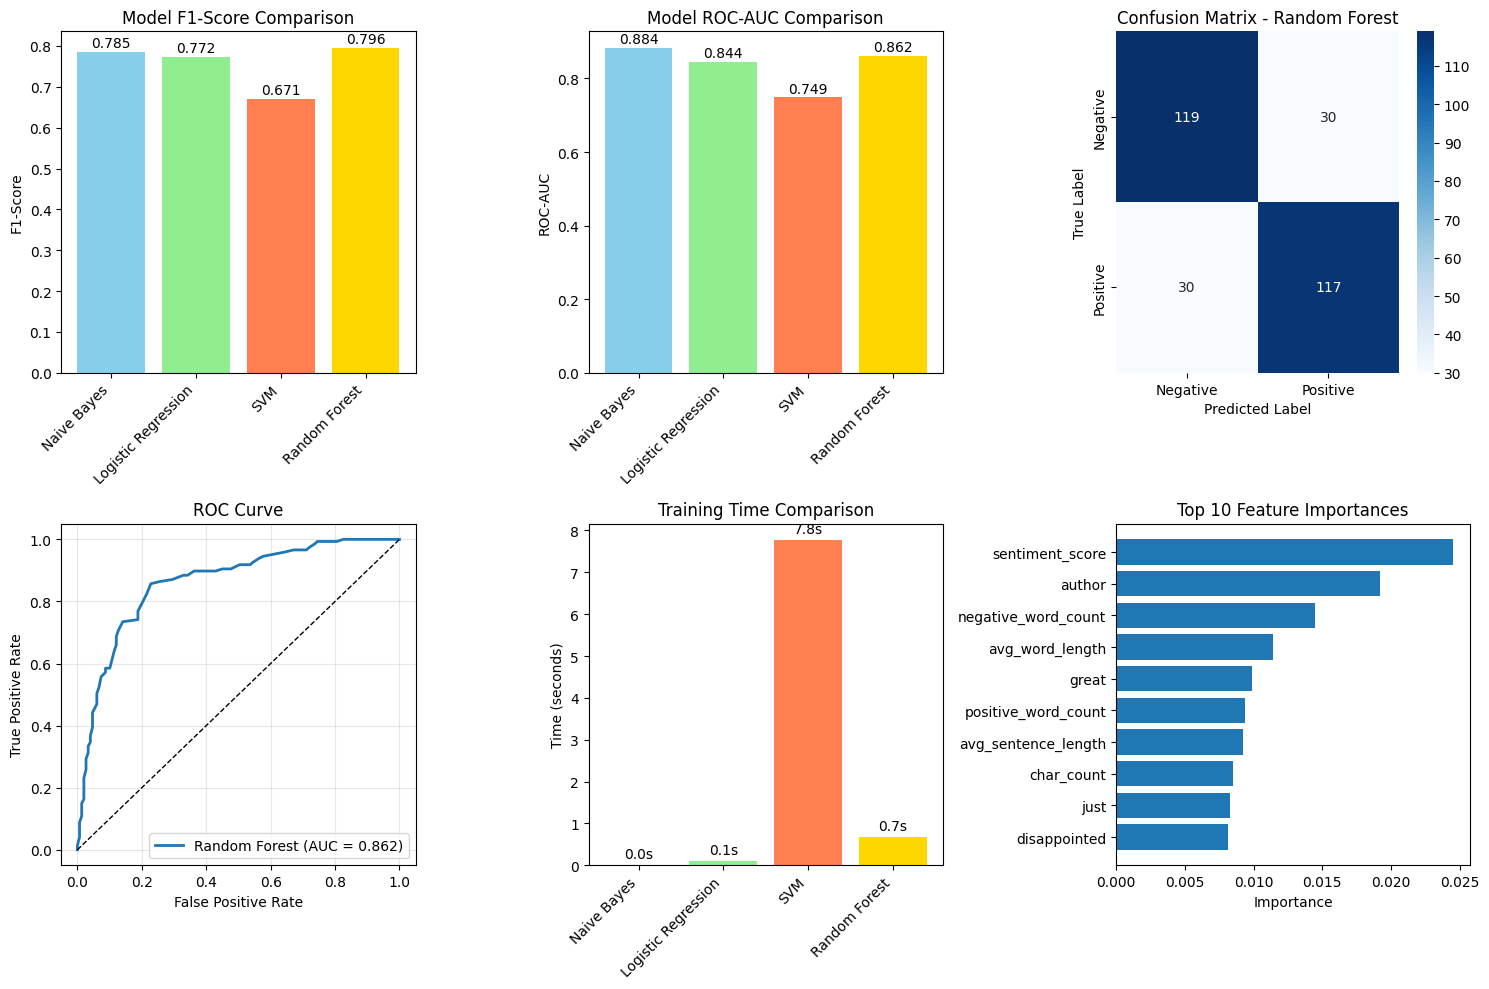

In [31]:
# =============================================================================
# PHASE 3: MODEL EVALUATION AND COMPARISON
# =============================================================================
print("\n" + "=" * 65)
print("📊 PHASE 3: MODEL EVALUATION AND COMPARISON")
print("-" * 40)

# 3.1 Create comprehensive results table
print("📋 Model Performance Summary:")
print("-" * 80)
print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'ROC-AUC':<10} {'Time(s)':<10}")
print("-" * 80)

for name in models.keys():
    results = model_results[name]
    print(f"{name:<20} {results['accuracy']:<10.4f} {results['precision']:<10.4f} "
          f"{results['recall']:<10.4f} {results['f1_score']:<10.4f} {results['roc_auc']:<10.4f} "
          f"{training_times[name]:<10.2f}")

# 3.2 Find best model
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['f1_score'])
best_model = model_results[best_model_name]['model']
best_f1 = model_results[best_model_name]['f1_score']

print(f"\n🏆 Best performing model: {best_model_name} (F1-Score: {best_f1:.4f})")

# 3.3 Detailed evaluation of best model
print(f"\n🔍 Detailed evaluation of {best_model_name}:")

best_predictions = model_results[best_model_name]['predictions']
cm = confusion_matrix(y_val, best_predictions)

print("\nConfusion Matrix:")
print(cm)
print(f"\nTrue Negatives: {cm[0,0]}, False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}, True Positives: {cm[1,1]}")

print(f"\nClassification Report:")
print(classification_report(y_val, best_predictions, target_names=['Negative', 'Positive']))

# 3.4 Visualize results
plt.figure(figsize=(15, 10))

# Model comparison plot
plt.subplot(2, 3, 1)
models_list = list(model_results.keys())
f1_scores = [model_results[model]['f1_score'] for model in models_list]
colors = ['skyblue', 'lightgreen', 'coral', 'gold']
bars = plt.bar(models_list, f1_scores, color=colors)
plt.title('Model F1-Score Comparison')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{f1_scores[i]:.3f}', ha='center', va='bottom')

# ROC-AUC comparison
plt.subplot(2, 3, 2)
roc_scores = [model_results[model]['roc_auc'] for model in models_list]
bars = plt.bar(models_list, roc_scores, color=colors)
plt.title('Model ROC-AUC Comparison')
plt.ylabel('ROC-AUC')
plt.xticks(rotation=45, ha='right')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{roc_scores[i]:.3f}', ha='center', va='bottom')

# Confusion matrix heatmap
plt.subplot(2, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# ROC Curve for best model
plt.subplot(2, 3, 4)
best_pred_proba = model_results[best_model_name]['pred_proba']
fpr, tpr, _ = roc_curve(y_val, best_pred_proba)
plt.plot(fpr, tpr, linewidth=2, label=f'{best_model_name} (AUC = {model_results[best_model_name]["roc_auc"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)

# Training time comparison
plt.subplot(2, 3, 5)
times = [training_times[model] for model in models_list]
bars = plt.bar(models_list, times, color=colors)
plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{times[i]:.1f}s', ha='center', va='bottom')

# Feature importance (for tree-based models)
plt.subplot(2, 3, 6)
if best_model_name == 'Random Forest':
    # Get feature importance
    feature_names = list(tfidf.get_feature_names_out()) + numeric_features
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        top_indices = np.argsort(importances)[-10:]
        top_features = [feature_names[i] for i in top_indices]
        top_importances = importances[top_indices]
        
        plt.barh(range(len(top_features)), top_importances)
        plt.yticks(range(len(top_features)), top_features)
        plt.title('Top 10 Feature Importances')
        plt.xlabel('Importance')
else:
    plt.text(0.5, 0.5, f'Feature importance\nnot available for\n{best_model_name}', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('Feature Importance')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [32]:
# =============================================================================
# PHASE 4: FINAL MODEL EVALUATION ON TEST SET
# =============================================================================
print("\n" + "=" * 65)
print("🎯 PHASE 4: FINAL EVALUATION ON TEST SET")
print("-" * 40)

print(f"🧪 Evaluating {best_model_name} on held-out test set...")

# Make predictions on test set
if best_model_name == 'Naive Bayes':
    test_predictions = best_model.predict(X_text_test_tfidf)
    test_pred_proba = best_model.predict_proba(X_text_test_tfidf)[:, 1]
else:
    X_test_dense = X_test_combined.toarray()
    test_predictions = best_model.predict(X_test_dense)
    test_pred_proba = best_model.predict_proba(X_test_dense)[:, 1]

# Calculate final metrics
final_accuracy = accuracy_score(y_test, test_predictions)
final_precision = precision_score(y_test, test_predictions)
final_recall = recall_score(y_test, test_predictions)
final_f1 = f1_score(y_test, test_predictions)
final_roc_auc = roc_auc_score(y_test, test_pred_proba)

print("\n🏆 FINAL TEST SET RESULTS:")
print("=" * 40)
print(f"Model: {best_model_name}")
print(f"Accuracy:  {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall:    {final_recall:.4f}")
print(f"F1-Score:  {final_f1:.4f}")
print(f"ROC-AUC:   {final_roc_auc:.4f}")

# Final confusion matrix
final_cm = confusion_matrix(y_test, test_predictions)
print(f"\nFinal Confusion Matrix:")
print(final_cm)

# =============================================================================
# PHASE 5: MODEL INTERPRETATION AND INSIGHTS
# =============================================================================
print("\n" + "=" * 65)
print("🔍 PHASE 5: MODEL INTERPRETATION AND INSIGHTS")
print("-" * 40)

# Error analysis - look at some misclassified examples
print("❌ Error Analysis - Misclassified Examples:")
misclassified_indices = np.where(test_predictions != y_test)[0]
print(f"Total misclassified: {len(misclassified_indices)} out of {len(y_test)} ({len(misclassified_indices)/len(y_test)*100:.1f}%)")

if len(misclassified_indices) > 0:
    print("\nSample misclassified reviews:")
    for i, idx in enumerate(misclassified_indices[:3]):  # Show first 3
        actual_idx = X_text_test.iloc[idx:idx+1].index[0]
        actual_label = "Positive" if y_test.iloc[idx] == 1 else "Negative"
        predicted_label = "Positive" if test_predictions[idx] == 1 else "Negative"
        confidence = test_pred_proba[idx]
        review_text = X_text_test.iloc[idx][:200] + "..."
        
        print(f"\n--- Misclassified Example {i+1} ---")
        print(f"Actual: {actual_label}, Predicted: {predicted_label}, Confidence: {confidence:.3f}")
        print(f"Review: {review_text}")

# Success criteria evaluation
print(f"\n✅ SUCCESS CRITERIA EVALUATION:")
print("=" * 40)
if final_f1 >= 0.90:
    performance_level = "EXCELLENT"
elif final_f1 >= 0.85:
    performance_level = "GOOD"
elif final_f1 >= 0.80:
    performance_level = "ACCEPTABLE"
else:
    performance_level = "NEEDS IMPROVEMENT"

print(f"Performance Level: {performance_level}")
print(f"Target Met: {'✅ YES' if final_f1 >= 0.80 else '❌ NO'}")

# Key insights
print(f"\n💡 KEY INSIGHTS:")
print("=" * 40)
print(f"1. Best performing model: {best_model_name}")
print(f"2. Final F1-Score: {final_f1:.4f} ({performance_level})")
print(f"3. Model shows {'good' if final_precision > 0.85 else 'acceptable'} precision ({final_precision:.3f})")
print(f"4. Model shows {'good' if final_recall > 0.85 else 'acceptable'} recall ({final_recall:.3f})")
print(f"5. Training time: {training_times[best_model_name]:.2f} seconds")

print(f"\n🎉 SENTIMENT ANALYSIS PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 65)
print(f"⏰ Finished at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("📊 Model is ready for deployment on new book reviews!")
print("=" * 65)


🎯 PHASE 4: FINAL EVALUATION ON TEST SET
----------------------------------------
🧪 Evaluating Random Forest on held-out test set...

🏆 FINAL TEST SET RESULTS:
Model: Random Forest
Accuracy:  0.7804
Precision: 0.7628
Recall:    0.8095
F1-Score:  0.7855
ROC-AUC:   0.8659

Final Confusion Matrix:
[[112  37]
 [ 28 119]]

🔍 PHASE 5: MODEL INTERPRETATION AND INSIGHTS
----------------------------------------
❌ Error Analysis - Misclassified Examples:
Total misclassified: 65 out of 296 (22.0%)

Sample misclassified reviews:

--- Misclassified Example 1 ---
Actual: Negative, Predicted: Positive, Confidence: 0.590
Review: i hope the ending is illogical at least and is fiction. if thoughts are that powerful they need to be resrained earlier. i do not know who survivied but he might feel very guilty about the others earl...

--- Misclassified Example 2 ---
Actual: Negative, Predicted: Positive, Confidence: 0.610
Review: i wanted to like this book... i enjoyed the first two in the series. but this